In [302]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
style.use("ggplot")

In [240]:
%run Data_cleaning.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   dt                             datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
 5   Latitude                       object        
 6   Longitude                      object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 459.2+ MB


In [241]:
df_budapest

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month,Day
1174550,1850-02-01,1.144,1.504,Budapest,Hungary,47.42N,20.13E,1850,2,1
1174551,1850-03-01,1.315,2.816,Budapest,Hungary,47.42N,20.13E,1850,3,1
1174552,1850-04-01,10.308,2.344,Budapest,Hungary,47.42N,20.13E,1850,4,1
1174553,1850-05-01,15.900,1.253,Budapest,Hungary,47.42N,20.13E,1850,5,1
1174554,1850-06-01,20.252,1.025,Budapest,Hungary,47.42N,20.13E,1850,6,1
...,...,...,...,...,...,...,...,...,...,...
1176508,2013-04-01,12.316,0.326,Budapest,Hungary,47.42N,20.13E,2013,4,1
1176509,2013-05-01,16.866,0.327,Budapest,Hungary,47.42N,20.13E,2013,5,1
1176510,2013-06-01,20.253,0.238,Budapest,Hungary,47.42N,20.13E,2013,6,1
1176511,2013-07-01,22.546,0.448,Budapest,Hungary,47.42N,20.13E,2013,7,1


In [242]:
df_budapest['Rolling_Avg'] = df_budapest['AverageTemperature'].rolling(window=240).mean()
avg_temperature_pivot = pd.pivot_table(df_budapest, values="AverageTemperature", index = "Year",fill_value=0,aggfunc="mean")
avg_temperature_pivot_moving_avarage = pd.pivot_table(df_budapest, values="Rolling_Avg" , index="Year", fill_value=0, aggfunc = "mean")
x1 = avg_temperature_pivot.index
y1 = avg_temperature_pivot["AverageTemperature"]
x2 = avg_temperature_pivot_moving_avarage.index
y2 = avg_temperature_pivot_moving_avarage["Rolling_Avg"]

In [243]:
def visualization_function(x_label, y_label , title, legendlist, legendloc,  xticksrotation) -> plt.figure: 
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title , fontsize=12)
    plt.legend(legendlist, loc = legendloc)
    plt.xticks(rotation = xticksrotation, ha = "right")
    plt.grid(True)
    plt.show()

### Task I. Find out if global warming is true or not?

C:\Users\Bánki Attila\AppData\Local\Temp\ipykernel_7996\1116996056.py:3: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.



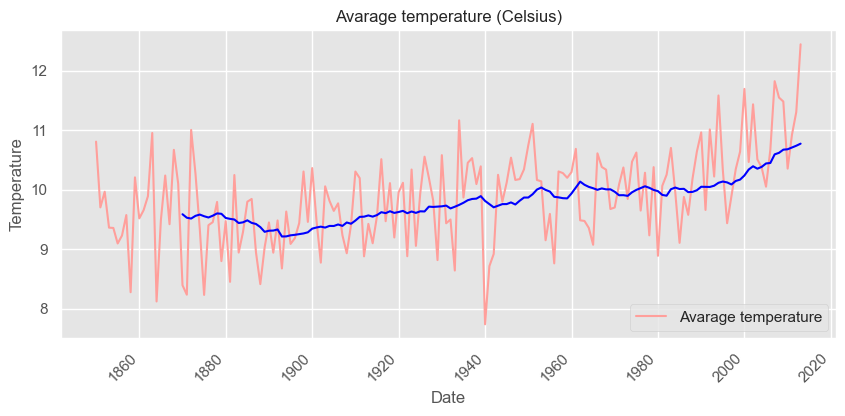

In [244]:
plt.figure(figsize= (10,4))
plt.plot(x1,y1, "r-")
plt.plot(x2,y2, "b-", color='blue')
visualization_function("Date","Temperature","Avarage temperature (Celsius)", ["Avarage temperature"], "lower right", 45)




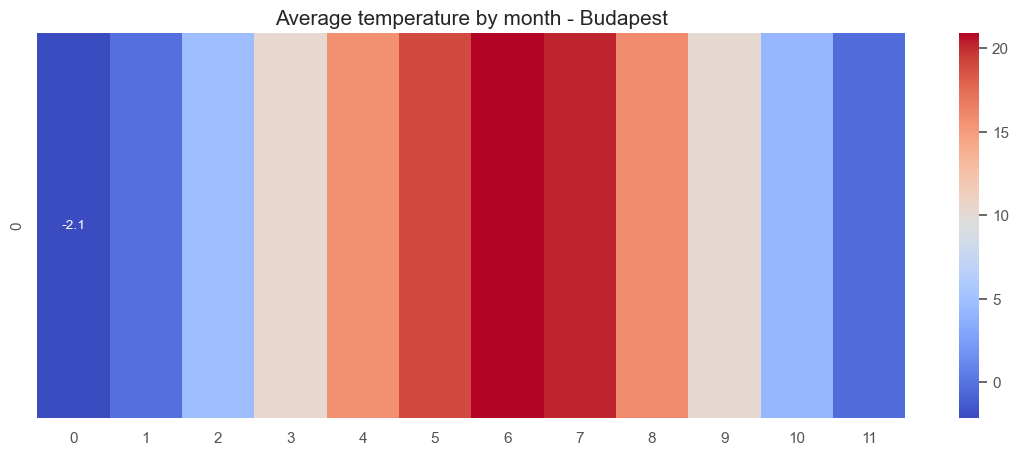

In [245]:
monthly_avg = df_budapest.groupby('Month')['AverageTemperature'].mean()
plt.figure(figsize=(14,5))
sns.heatmap(monthly_avg.values.reshape(1,12), cmap='coolwarm', annot=True, cbar=True)
plt.title('Average temperature by month - Budapest', fontsize=15)
plt.show()

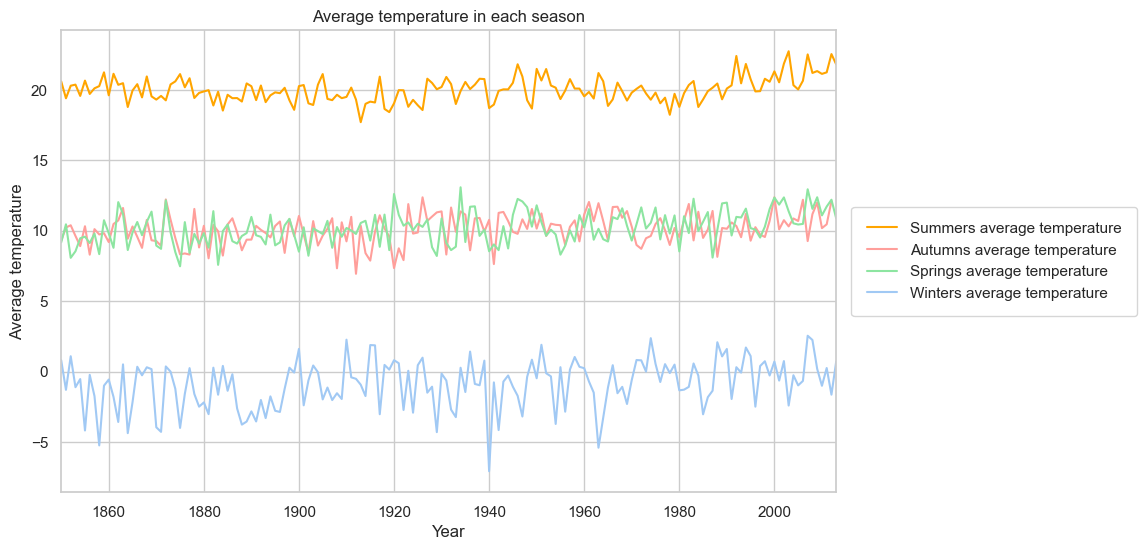

In [246]:

def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
    
min_year = df_budapest['Year'].min()
max_year = df_budapest['Year'].max()
years = range(min_year, max_year + 1)

df_budapest['season'] = df_budapest['Month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = df_budapest[df_budapest['Year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['AverageTemperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['AverageTemperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['AverageTemperature'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['AverageTemperature'].mean())

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, summer_temps, label='Summers average temperature', color='orange')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='r')
plt.plot(years, spring_temps, label='Springs average temperature', color='g')
plt.plot(years, winter_temps, label='Winters average temperature', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

### Makeing a prdedictions to confirm the hypotesis

In [261]:
corr_matrix = df_budapest.corr(numeric_only=True)
corr_matrix

,Year,AverageTemperature
Year,1.00000,0.48885
AverageTemperature,0.48885,1.00000


In [304]:

df_budapest = df_budapest.groupby('Year')['AverageTemperature'].mean().reset_index()

x = df_budapest['Year'].values.reshape(-1, 1)
y = df_budapest['AverageTemperature'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [305]:
# make the predictions with the model
y_pred = model.predict(x_test)

future_years = np.array([[2025], [2030], [2035]])
future_temps = model.predict(future_years)

print(f'The temperature in 2025 will be : {future_temps[0].round(2)} Celsius ' )
print(f'The temperature in 2030 will be : {future_temps[1].round(2)} Celsius ' )
print(f'The temperature in 2035 will be : {future_temps[2].round(2)} Celsius ' )

accuracy = model.score(x_test, y_test)
print(f'The accuracy is : {accuracy:.2%}')

The temperature in 2025 will be : 10.66 Celsius 
The temperature in 2030 will be : 10.7 Celsius 
The temperature in 2035 will be : 10.75 Celsius 
The accuracy is : 16.76%
